In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [2]:
dfMorts = pd.read_html('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
dfCases = pd.read_html('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
dfMort = dfMorts[0]
dfCase = dfCases[0]
dfList = [dfMort, dfCase]
print(dfMort.head(), dfCase.head())
print(dfMort.columns, dfCase.columns)

   Unnamed: 0 Province/State Country/Region      Lat      Long  1/22/20  \
0         NaN            NaN       Thailand  15.0000  101.0000        0   
1         NaN            NaN          Japan  36.0000  138.0000        0   
2         NaN            NaN      Singapore   1.2833  103.8333        0   
3         NaN            NaN          Nepal  28.1667   84.2500        0   
4         NaN            NaN       Malaysia   2.5000  112.5000        0   

   1/23/20  1/24/20  1/25/20  1/26/20   ...     3/7/20  3/8/20  3/9/20  \
0        0        0        0        0   ...          1       1       1   
1        0        0        0        0   ...          6       6      10   
2        0        0        0        0   ...          0       0       0   
3        0        0        0        0   ...          0       0       0   
4        0        0        0        0   ...          0       0       0   

   3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  
0        1        1        1        1

In [3]:
#df = pd.read_csv('C:\\Users\\vroum\\Documents\\Dossier_Quentin\\BigData-Machine Learning\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_19-covid-Deaths.csv', sep=',')
dfListTreat = []
for df in dfList:
    df.drop(['Unnamed: 0', 'Province/State', 'Lat', 'Long'], axis=1, inplace = True)
    df = df.groupby(['Country/Region']).sum()
    df = df.T
    df = df.reset_index()
    df = df.rename(columns={'index': 'date'})
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df = df.iloc[24:]
    dfListTreat.append(df)
    print(df.head())
    for c in df.columns:
        print(c)

dfMort = dfListTreat[0]
dfCase = dfListTreat[1]

Country/Region  Afghanistan  Albania  Algeria  Andorra  Antigua and Barbuda  \
date                                                                          
2020-02-15                0        0        0        0                    0   
2020-02-16                0        0        0        0                    0   
2020-02-17                0        0        0        0                    0   
2020-02-18                0        0        0        0                    0   
2020-02-19                0        0        0        0                    0   

Country/Region  Argentina  Armenia  Aruba  Australia  Austria  \
date                                                            
2020-02-15              0        0      0          0        0   
2020-02-16              0        0      0          0        0   
2020-02-17              0        0      0          0        0   
2020-02-18              0        0      0          0        0   
2020-02-19              0        0      0          0    

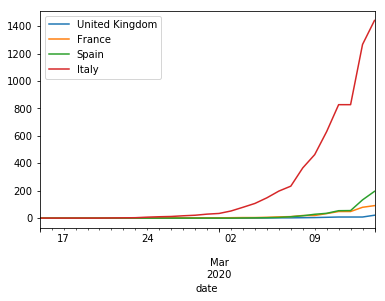

In [17]:
dfMort['United Kingdom'].plot()
dfMort['France'].plot()
dfMort['Spain'].plot()
dfMort['Italy'].plot()
plt.legend()
plt.show()

In [39]:
countryList = list(df.columns)
#print(countryList)

countryDP_ref = widgets.Dropdown(
    options=countryList,
    value='France',
    description='Reference Country:',
    disabled=False,)
countryDP_shift = widgets.Dropdown(
    options=countryList,
    value='France',
    description='Country to be compared:',
    disabled=False,)
display(countryDP_ref)
display(countryDP_shift)
#print(countryDP_ref.value)
#print(countryDP_shift.value)

France
France


In [41]:
def f(x):
    countryRef = countryDP_ref.value
    countryShift = countryDP_shift.value
    dfShift1 = dfMort[countryShift]
    dfRef1 = dfMort[countryRef]
    dfShift1 = dfShift1.reset_index()
    dfShift1['date'] = dfShift1['date'] + pd.Timedelta(str(x)+' day')
    dfShift1 = dfShift1.set_index('date')
    dfShift2 = dfCase[countryShift]
    dfRef2 = dfCase[countryRef]
    dfShift2 = dfShift2.reset_index()
    dfShift2['date'] = dfShift2['date'] + pd.Timedelta(str(x)+' day')
    dfShift2 = dfShift2.set_index('date')
    #print(dfF.head())
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.plot(dfShift1, label=countryShift)
    plt.plot(dfRef1, label=countryRef)
    #print(dfShift1.columns)
    #dfShift1.plot()
    #dfRef1.plot()
    plt.yscale('log')
    plt.ylabel('Deaths')
    plt.legend()
    plt.subplot(212)
    plt.plot(dfShift2, label=countryShift)
    plt.plot(dfRef2, label=countryRef)
    plt.yscale('log')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()
x = interact(f, x=(-15,5,1));

In [25]:
print(df['Italy'].iloc[-8])
print(df['France'].iloc[-1])

9172
6650


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'French Guiana', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Kosovo', 'Kuwa

France
